## Problem Statement
- 
Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

- We'll find out which features are significant in predicting the reason for hospitalization for different regions.
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges
- We'll use statistical techniques and hypothesis testing to find relationship between dependent and independent variables


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm,f_oneway,chi2_contingency
import statsmodels.api as sm
import scipy.stats as stats
import pylab

In [130]:
df = pd.read_csv('apollo_hospitals.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [131]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [132]:
df.shape

(1338, 7)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [134]:
df.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,2,2,4,NaN,NaN,NaN
top,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,676,1064,364,NaN,NaN,NaN
mean,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [135]:
df['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [136]:
df['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [137]:
df['region'].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [138]:
df['severity level'].value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: severity level, dtype: float64

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

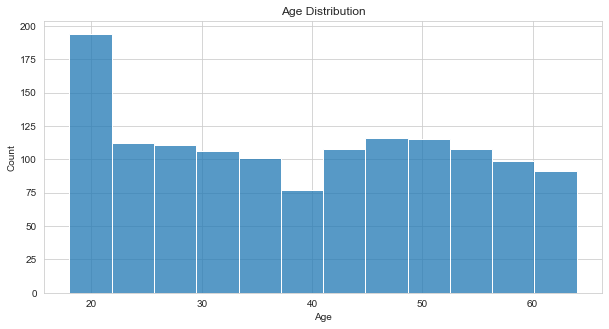

In [139]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show

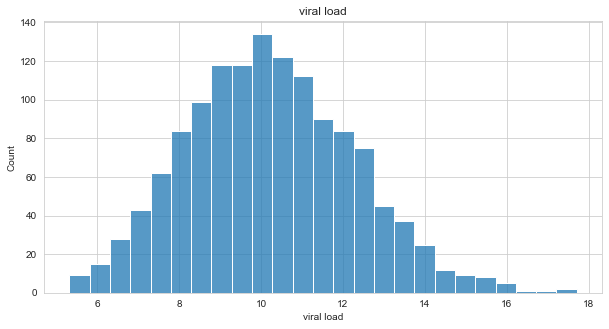

In [240]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['viral load'])
plt.title("viral load")
plt.xlabel("viral load")
plt.show()

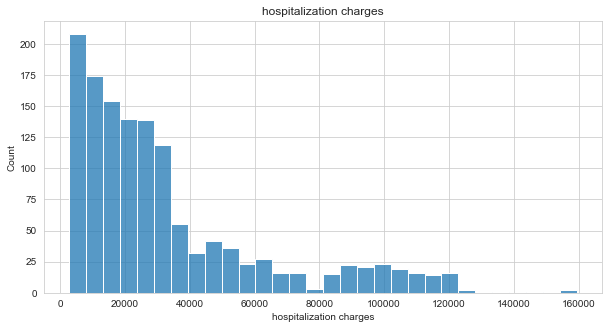

In [141]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['hospitalization charges'])
plt.title("hospitalization charges")
plt.xlabel("hospitalization charges")
plt.show()

## Bivariate Analysis

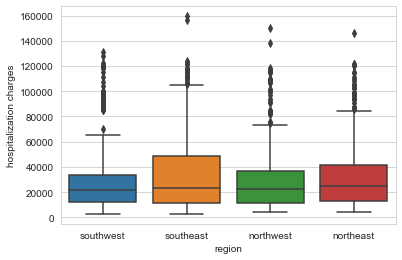

In [142]:
sns.boxplot(x='region',y='hospitalization charges',data=df)
plt.show()

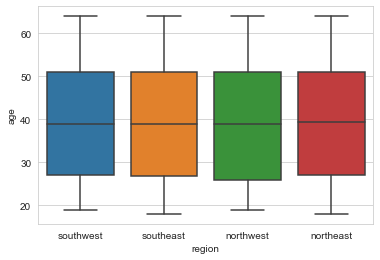

In [266]:
sns.boxplot(x='region',y='age',data=df)
plt.show()

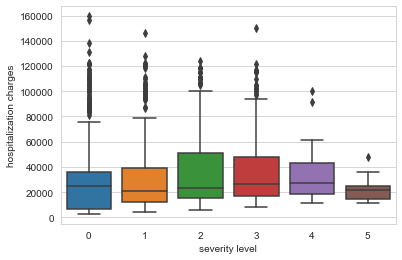

In [143]:
sns.boxplot(x='severity level',y='hospitalization charges',data=df)
plt.show()

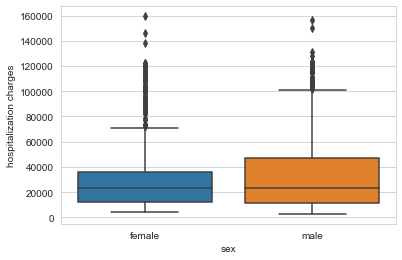

In [144]:
sns.boxplot(x='sex',y='hospitalization charges',data=df)
plt.show()

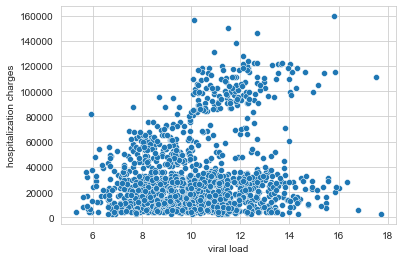

In [145]:
sns.scatterplot(x='viral load',y='hospitalization charges',data=df)
plt.show()

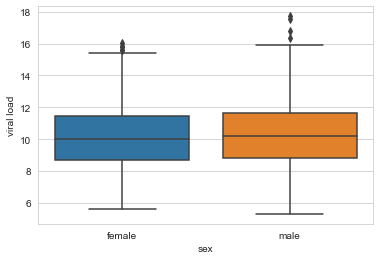

In [146]:
sns.boxplot(x='sex',y='viral load',data=df)
plt.show()

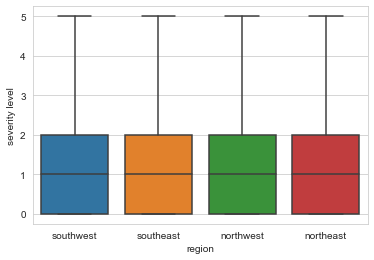

In [147]:
sns.boxplot(x='region',y='severity level',data=df)
plt.show()

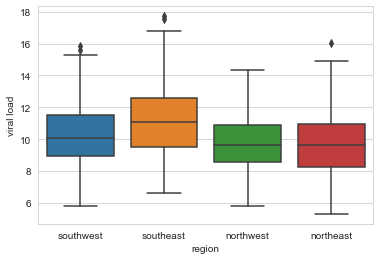

In [148]:
sns.boxplot(x='region',y='viral load',data=df)
plt.show()

## Missing values

In [149]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> There are no missing values in the dataset.
</div>

## Outlier Detection And Handling

In [231]:
def outliers(col_name):
    q1 = np.percentile(df[col_name],0.25)
    q3 = np.percentile(df[col_name],0.75)
    IQR= q3-q1
    lower_lim = q1 - 1.5*IQR
    upper_lim = q3 + 1.5*IQR
    outliers = df[(df[col_name]>upper_lim) | (df[col_name]<lower_lim)]
    return outliers

In [234]:
charges_outliers = outliers('hospitalization charges')
charges_outliers.shape

(1318, 7)

In [238]:
viral_load_outliers = outliers('viral load')
viral_load_outliers.shape

(1319, 7)

## EDA Comments

- Insighs Based ON EDA
    - Max patients are of the age 18-21 and then all other age groups are equally likely.
    - Viral load follows a normal distribution
    - Most of the hospitalization charges tends to be on the lower side.
    - Severity level is same for all the 4 regions
    - median viral load is more in southeast region in comparison to others.

## Hypothesis Testing

### Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?


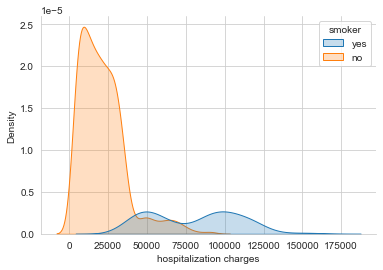

In [241]:
## Visual Analysis
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='hospitalization charges', hue='smoker', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is not normal for both the groups. Also we can see that the smokers have more hospitalization charges than non smokers. We need to check this hypothesis using hypothesis testing techniques.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is not normally distributed for both groups(i.e smokers and non smokers)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: There is no impact of smoking on hospitalization charges.
    - Alternate Hypothesis: smokers have high hospitalization charge in comparison to non smokers.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample right tailed T-test since we need to compare mean of two independendent group. The 2 sample right tailed t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other since each smoking is an independent behaviour of human.
- We assume that both the groups are obtained from random sampling.
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar.

In [242]:
smokers = df[df['smoker']=='yes']['hospitalization charges']
non_smokers = df[df['smoker']=='no']['hospitalization charges']

In [243]:
smokers_variance = np.var(smokers)
non_smokers_variance = np.var(non_smokers)
print("variance of hospitalization charges for smokers is {} and variance of hospitalization charges for non smokers is {}".format(smokers_variance,non_smokers_variance))

variance of hospitalization charges for smokers is 829508540.9016069 and variance of hospitalization charges for non smokers is 224322878.53678074


### Applying Log normal transformation to convert the data to gaussian


In [244]:
def normality(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

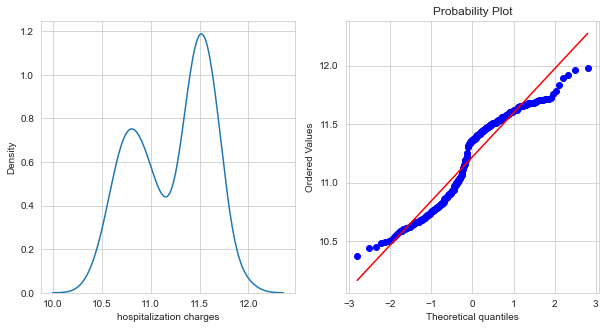

In [245]:
smokers_hospitalization_charges_transformed = np.log(smokers)
non_smokers_hospitalization_charges_transformed = np.log(non_smokers)
normality(smokers_hospitalization_charges_transformed)

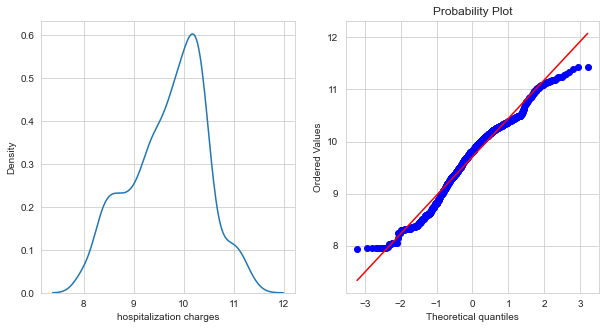

In [246]:
normality(non_smokers_hospitalization_charges_transformed)

In [247]:
print("variance of hospitalization charges for smokers is {} and variance of hospitalization charges for non smokers is {}".
      format(np.var(smokers_hospitalization_charges_transformed),np.var(non_smokers_hospitalization_charges_transformed)))

variance of hospitalization charges for smokers is 0.14962519951216605 and variance of hospitalization charges for non smokers is 0.5533745710343354


### Calculating p-value using 2 sample right tailed t-test for independenet variables

In [248]:
stats.ttest_ind(smokers_hospitalization_charges_transformed,
                non_smokers_hospitalization_charges_transformed,
                equal_var=False,alternative='greater')

Ttest_indResult(statistic=46.37082591943892, pvalue=1.9600240968860024e-234)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 1.96^(-234) which is much less than our significance value alpha. So based on this
    We can say that we can reject the Null Hypothesis. It means smokers have a high hospitalization charge in comparison to non smokers.
</div>

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

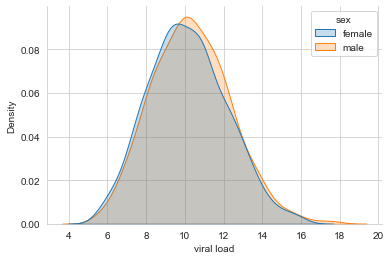

In [249]:
## Visual Analysis
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='viral load', hue='sex', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot it is clear that the distribution is  normal for both the groups.
    Also we can see that the viral load of females is not much different from males. 
    We need to check this hypothesis using hypothesis testing techniques.
</div>

### Assumptions
* Both groups are independent
* Both groups are obtained through random sampling
* Data in each group is normally distributed
* variance of both the groups should be similar
* By visual analysis we can see that the data is normally distributed for both groups(i.e male and female)

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: There is no difference between viral load of male and female.
    - Alternate Hypothesis: viral load of females is different from that of males.
    - We'll consider the significance value as 5% and perform a two tailed test
- Test Selection
    - We'll use 2 sample T-test since we need to compare mean of two independendent group. The 2 sample t-test behaves similar to 2 sample z-test for large dataset(i.e. n>30)

### Checking Test assumptions
- We know that both groups are independent of each other..
- We assume that both the groups are obtained from random sampling.
- Data in each group is normally distributed.
- Variance of both the groups must be similar.

In [250]:
female_viral_load = df[df['sex']=='female']['viral load']
male_viral_load = df[df['sex']=='male']['viral load']

In [251]:
female_viral_load_var = np.var(female_viral_load)
male_viral_load_var = np.var(male_viral_load)
print("variance of female viral load is {} and variance of male viral load is {}"
      .format(female_viral_load_var,male_viral_load_var))

variance of female viral load is 4.055708441872559 and variance of male viral load is 4.183557507396447


In [252]:
def normality(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

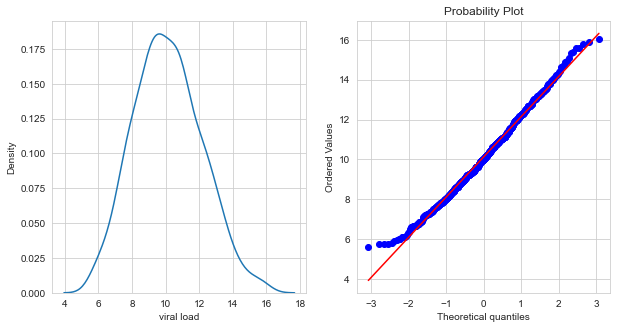

In [253]:
normality(female_viral_load)


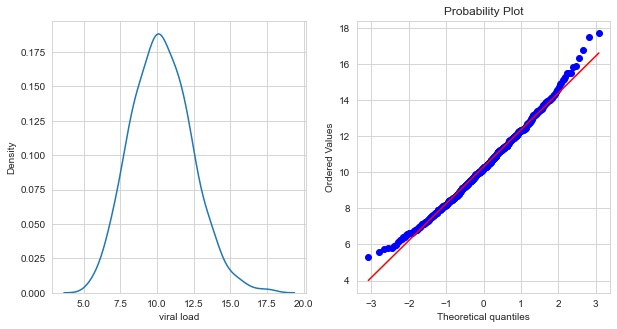

In [254]:
normality(male_viral_load)

### Calculating p-value using 2 sample t-test for independenet variables

In [255]:
stats.ttest_ind(female_viral_load,
                male_viral_load)

Ttest_indResult(statistic=-1.695711164450323, pvalue=0.0901735841670204)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.09 which is greater than our significance value alpha. So based on this
    We can say that we can say that we fail to reject the null hypothesis. It means there is no difference male and female viral load.
</div>

### Chi square test to check whether Smoking is significantly diffferent for different regions 


### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: Smoking is similar for different regions 
    - Alternate Hypothesis: Smoking is significantly different for different regions.
    - We'll consider the significance value as 5% and perform chi square test for independence.
- Test Selection
    - We'll use 2 sample Chi sqaure test for independence since we have categorical variables having two or more categories and we need to check whether they are dependent on each other or not.

### Test Assumption
- Since chi square is a non parametric test, it doesn't have any assumptions.

In [256]:
s1 = df[df['region']=='southeast']['smoker'].astype('string').value_counts().to_list()
s2 = df[df['region']=='southwest']['smoker'].astype('string').value_counts().to_list()
s3 = df[df['region']=='northwest']['smoker'].astype('string').value_counts().to_list()
s4 = df[df['region']=='northeast']['smoker'].astype('string').value_counts().to_list()

In [257]:
contingency_table = [s1,s2,s3,s4]
contingency_table

[[273, 91], [267, 58], [267, 58], [257, 67]]

In [258]:

stat, p, dof, expected = chi2_contingency(contingency_table)
print("p value is {}".format(p))

p value is 0.06171954839170541


<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.06 which is much larger than our significance value alpha. So based on this
    We can say that we fail to reject the Null Hypothesis. It means that Smoking habit is similar for different regions</div>

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)


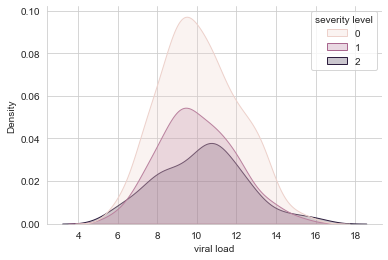

In [259]:
## visual Analysis
sns.set_style('whitegrid')
female = df[(df['sex']=='female') & (df['severity level'].isin([0,1,2]))]
sns.kdeplot(data=female, x='viral load', hue='severity level', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the above plot we can observe that all the plots are not normally distributed, we'll confirm this using qq-plot.We'll check this using hypothesis testing.
</div> 

### Hypothesis Formulation and test selection
- We'll have the following hypothesis
    - Null Hypothesis: Mean viral load for female for 0,1 and 2 severity level same
    - Alternate Hypothesis: Mean viral load for female for 0,1 and 2 severity level different.
    - We'll consider the significance value as 5% and perform a two tailed test.
- Test Selection
    - We'll use 2 sample ANOVA since we need to compare mean of multiple groups.

### Checking Test assumptions
- We know that all groups are independent of each other since each women is independent of each other.
- Data in each group is normally distributed - This assumption breaks as we have seen in the above plot. We need to apply a log transform to convert it to gaussian.
- Variance of both the groups must be similar.

In [260]:
viral_load_in_severity_level_0 = df[(df['sex']=='female') & (df['severity level']==0)]['viral load']
viral_load_in_severity_level_1 = df[(df['sex']=='female') & (df['severity level']==1)]['viral load']
viral_load_in_severity_level_2 = df[(df['sex']=='female') & (df['severity level']==2)]['viral load']



In [261]:
variance_of_viral_load_in_severity_level_0 = np.var(viral_load_in_severity_level_0)
variance_of_viral_load_in_severity_level_1 = np.var(viral_load_in_severity_level_1)
variance_of_viral_load_in_severity_level_2 = np.var(viral_load_in_severity_level_2)
print("variance of viral load with severity level 0 : {}".format(variance_of_viral_load_in_severity_level_0))
print("variance of viral load with severity level 1 : {}".format(variance_of_viral_load_in_severity_level_1))
print("variance of viral load with severity level 2 : {}".format(variance_of_viral_load_in_severity_level_2))


variance of viral load with severity level 0 : 3.942714696902578
variance of viral load with severity level 1 : 3.697740426213749
variance of viral load with severity level 2 : 4.841683920627076


### Applying Log normal transformation to convert the data to gaussian


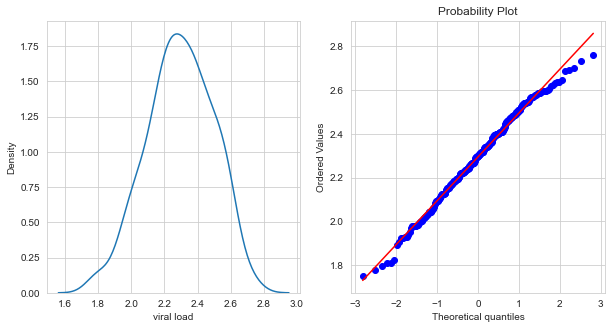

In [262]:
viral_load_in_severity_level_0_transformed = np.log(viral_load_in_severity_level_0)
viral_load_in_severity_level_1_transformed = np.log(viral_load_in_severity_level_1)
viral_load_in_severity_level_2_transformed = np.log(viral_load_in_severity_level_2)
normality(viral_load_in_severity_level_0_transformed)

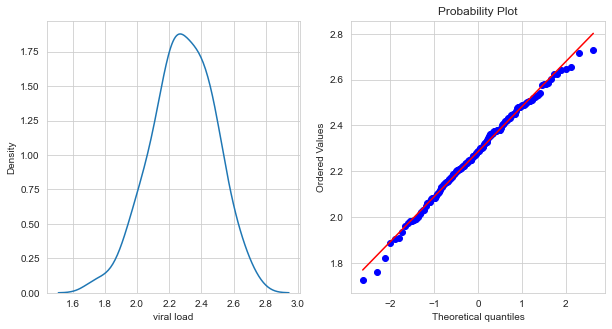

In [263]:
normality(viral_load_in_severity_level_1_transformed)

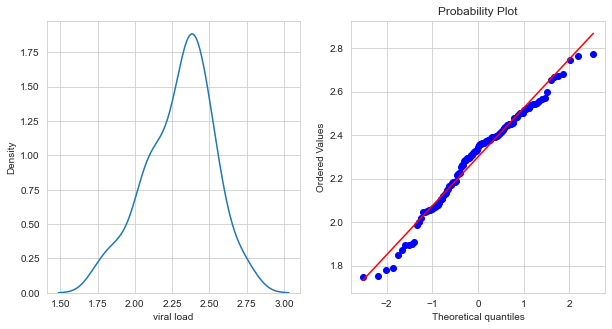

In [264]:
normality(viral_load_in_severity_level_2_transformed)

### Calculating p-value using ANOVA for season

In [265]:
f_oneway(viral_load_in_severity_level_0_transformed,
         viral_load_in_severity_level_1_transformed,
         viral_load_in_severity_level_2_transformed)

F_onewayResult(statistic=0.18378307923547985, pvalue=0.832166188721299)

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Based on above result p-value = 0.83 which is much larger than our significance value alpha. So based on this
    We can say that we fail to reject the Null Hypothesis. mean viral load for severity level 0,1 and 2 are same.
</div>

## Business Insights
- Median viral load is high in southeast region in comparison to other regions
- Smokers have a high hospitalization charges in comparison to non smokers
- There is no difference in male and female viral load
- viral load for severity 0,1,2 are almost same.
- Smoking habit is similar for different regions.

## Recommendations
- Hospitals can work on finding why viral load is high in southeast region comparison to other regions and work on reducing it.
- Smokers are being charged more in comparison to non smokers. It may imply that the smokers are seriously ill or there is a human bias involve while charging the patients based on their smoking history. Hospitals needs to look into this.
- There is not much difference in viral load between male and female. Hospitals can treat the patients independent of their gender.
- viral load for severity 0,1,2 are almost same, so hospitals can give them similar treatment to bring down viral load.
